In [2]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

np.random_state = 42

In [60]:
batting = pd.read_csv('Data/batting_adv', index_col = 0)
clust_batting = batting.drop(columns = ['Name', 'POS', 'Team', 'Season', 'Salary', 'Dol', 'Age Rng'])
clust_batting.head()

,Age,Adjusted 2021 Salary,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
0,40.0,10029411.0,78.0,133.0,155.0,33.0,23.0,9.0,0.0,1.0,12.0,14.0,20.0,0.0,21.0,0.0,2.0,0.0,3.0,1.0,0.0,0.248,56.0,33.0,25.0,0.0,647.0,260.0,387.0,0.0,0.0,0.0,0.129,0.135,0.95,0.342,0.338,0.680,0.090,0.283,0.0170,0.219,0.491,0.289,0.000,0.030,0.000,0.00,0.309,-0.1,17.0,0.0,-4.7,4.4,-1.4,-2.0,-0.2,2.4,100.0,0.23,-3.06,3.28,2.82,0.36,1.26,1.60,43.0,0.26,-0.08,0.637,92.5,0.099,83.8,0.053,88.1,0.079,78.0,0.124,83.7,0.009,87.2,0.000,0.0,0.000,0.0,2.0,-0.1,-0.1,-0.3,-1.2,-0.1,0.0,0.49,-0.13,-0.35,-0.52,-1.45,-0.96,0.00,0.254,0.546,0.377,0.653,0.919,0.816,0.422,0.613,0.070,-0.6,0.321,0.151,0.036,0.017,0.0,0.172,0.125,0.045,0.023,0.002,0.108,0.0,0.000,0.0,93.1,92.1,89.4,86.5,0.0,91.6,83.7,77.2,80.1,64.8,83.0,0.0,0.0,-3.2,-7.3,1.5,-5.4,0.0,-7.0,2.4,4.8,5.9,6.1,-7.2,0.0,0.0,8.0,5.2,5.5,2.5,0.0,4.5,-0.2,-7.4,-8.5,-12.6,3.3,0.0,0.0,-1.2,2.2,-0.7,-0.3,0.0,1.1,0.5,-1.1,0.3,-0.1,-0.5,0.0,0.0,-0.56,2.20,-2.95,-3.06,0.0,1.03,0.60,-3.63,1.79,-5.40,-0.76,0.0,0.00,0.235,0.534,0.377,0.588,0.927,0.816,0.474,25.8,-6.1,0.0,-0.5,-0.6,0.3,-0.1,0.377,0.342,0.281,0.105,0.614,0.281,0.271,0.097,0.002,0.073,0.413,0.042,0.029,0.000,0.000,0.219,0.110,0.000,84.1,65.7,79.1,93.8,89.7,86.2,0.0,0.0,92.7,84.7,0.0,-7.4,3.1,5.5,-3.5,1.5,-5.7,0.0,0.0,-7.4,2.2,0.0,2.8,-13.7,-8.2,7.2,4.4,1.4,0.0,0.0,4.1,-0.2,0.0,0.7,-0.1,0.2,0.2,-0.1,-0.1,0.0,0.0,0.1,0.1,0.0,1.09,-5.40,0.42,0.06,-0.27,-0.56,0.00,0.00,0.06,0.14,0.00,0.216,0.542,0.377,0.563,0.919,0.816,0.493,25.8,0.0,97.0,165.0,68.0,107.0,86.0,65.0,93.0,1.04,110.0,85.0,31.0,96.0,99.0,108.0,59.0,118.0,94.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.221,0.291,0.0,0.0,0.0
1,26.0,1894444.0,

In [61]:
k_means = KMeans(n_clusters = 2)
k_means.fit(clust_batting)

KMeans(n_clusters=2)

In [62]:
predicted_clusters = k_means.predict(clust_batting)

In [63]:
batting.columns

Index(['Season', 'Name', 'POS', 'Team', 'Age', 'Salary',
       'Adjusted 2021 Salary', 'G', 'AB', 'PA',
       ...
       'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events', 'CStr%', 'CSW%',
       'xBA', 'xSLG', 'xwOBA'],
      dtype='object', length=321)

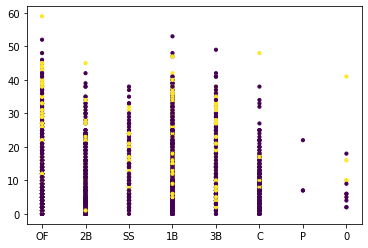

In [66]:
plt.scatter(batting['POS'], clust_batting['HR'], c=predicted_clusters, s=10);
centers = k_means.cluster_centers_
